In [38]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("weather.csv")
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64


In [6]:
# 1. Handling Missing Values
# Fill missing numerical values with mean and categorical values with mode
numerical_cols = df.select_dtypes(include=['float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = SimpleImputer(strategy='most_frequent')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [14]:
# 2. Categorical Data
# Assuming 'WindGustDir', 'WindDir9am', and 'WindDir3pm' are categorical columns
# Use one-hot encoding to convert them
categorical_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
df = pd.get_dummies(df, columns=categorical_cols)

In [15]:
# 3. Feature Scaling
# Assuming 'MinTemp', 'MaxTemp', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'
# are the numerical features to be scaled
numerical_features = ['MinTemp', 'MaxTemp', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the cleaned and preprocessed data
print("Cleaned and Preprocessed Data:\n", df.head())

Cleaned and Preprocessed Data:
     MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.122047  0.561221       0.0    -0.420844       6.3      -0.754544   
1  1.119129  0.950363       3.6    -0.045713       9.7      -0.064459   
2  1.069275  0.426518       3.6     0.479471       3.3       3.462647   
3  1.002802 -0.755874      39.8     1.004655       9.1       1.085685   
4  0.055575 -0.666072       2.8     0.404445      10.6       0.778980   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_NNW  \
0     -0.459131      0.227664           68           29  ...           False   
1           NaN     -0.111515           80           36  ...           False   
2     -0.459131     -1.355171           82           69  ...           False   
3      2.560742      0.679902           62           56  ...           False   
4      1.302462      1.132141           68           49  ...           False   

   WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  W

In [18]:
df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 67 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MinTemp          366 non-null    float64
 1   MaxTemp          366 non-null    float64
 2   Rainfall         366 non-null    float64
 3   Evaporation      366 non-null    float64
 4   Sunshine         363 non-null    float64
 5   WindGustSpeed    364 non-null    float64
 6   WindSpeed9am     356 non-null    float64
 7   WindSpeed3pm     366 non-null    float64
 8   Humidity9am      366 non-null    int64  
 9   Humidity3pm      366 non-null    int64  
 10  Pressure9am      366 non-null    float64
 11  Pressure3pm      366 non-null    float64
 12  Cloud9am         366 non-null    int64  
 13  Cloud3pm         366 non-null    int64  
 14  Temp9am          366 non-null    float64
 15  Temp3pm          366 non-null    float64
 16  RainToday        366 non-null    object 
 17  RISK_MM         

In [37]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame

# Columns with missing values
columns_with_missing = ['Sunshine']

# Impute numerical columns with mean
numerical_cols = df[columns_with_missing].select_dtypes(include=['float64']).columns
numerical_transformer = SimpleImputer(strategy='mean')

# Apply the transformation to the specific column
df[columns_with_missing] = numerical_transformer.fit_transform(df[columns_with_missing])

# Verify that there are no more missing values
print("Missing Values After Imputation:\n", df.isnull().sum()) 

Missing Values After Imputation:
 MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
                 ..
WindDir3pm_SSW    0
WindDir3pm_SW     0
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
Length: 67, dtype: int64


# VISULIZATION

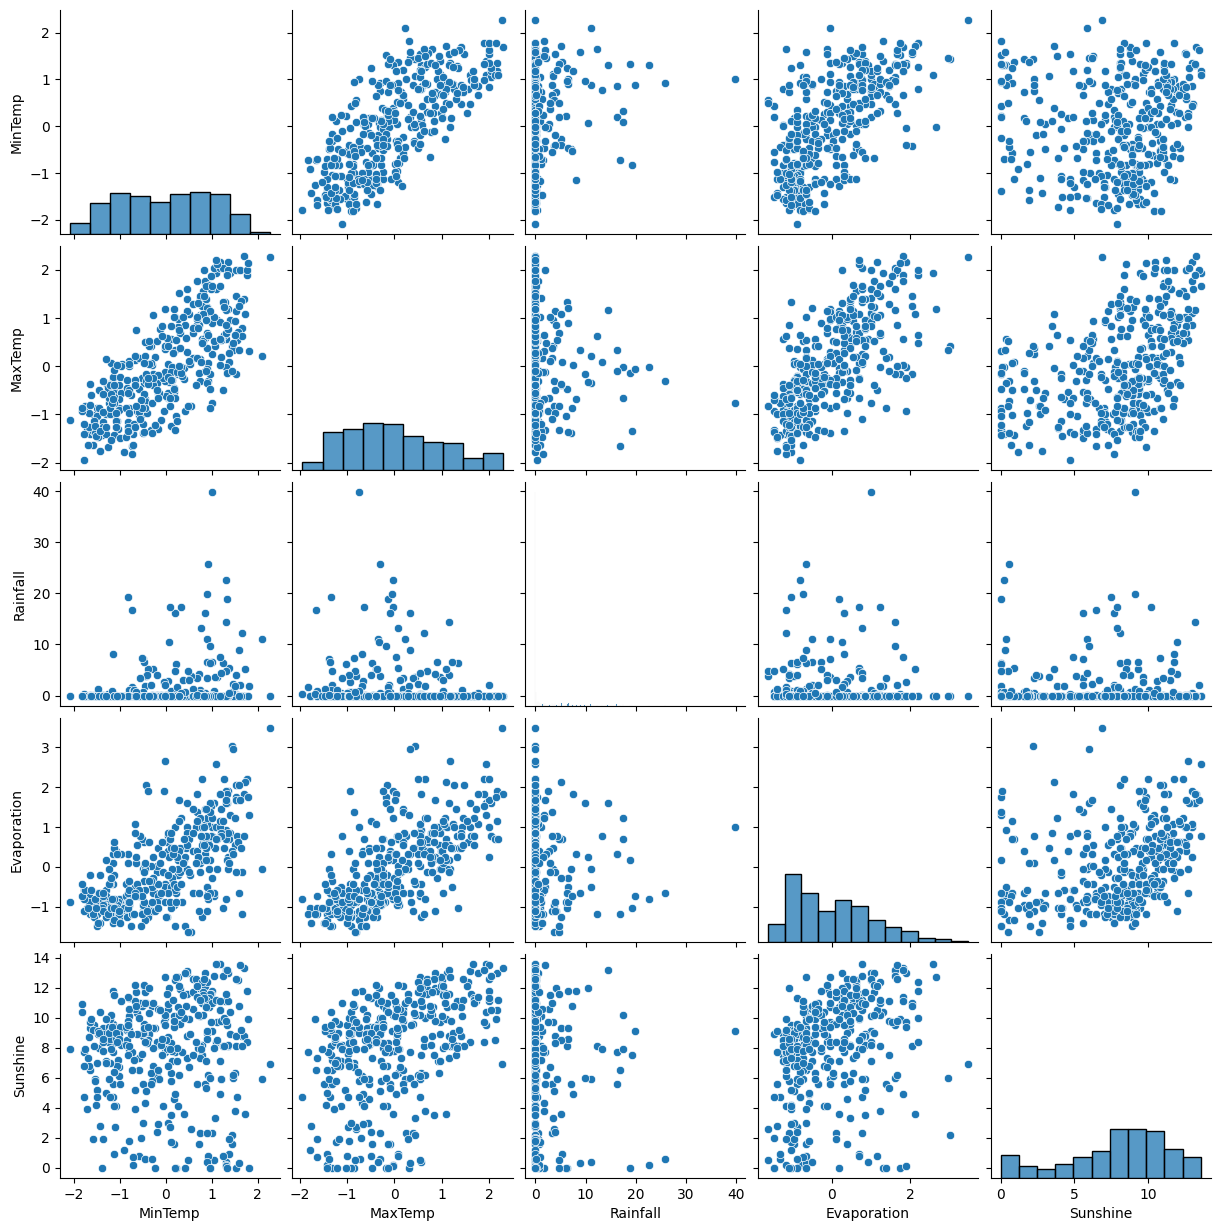

In [39]:
# Assuming df is your DataFrame
# Selecting a subset of columns for visualization
columns_for_plot = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']

# Create a DataFrame with selected columns
df_subset = df[columns_for_plot]

# Drop rows with missing values for the pair plot
df_subset = df_subset.dropna()

# Create a pair plot
sns.pairplot(df_subset)
plt.show()

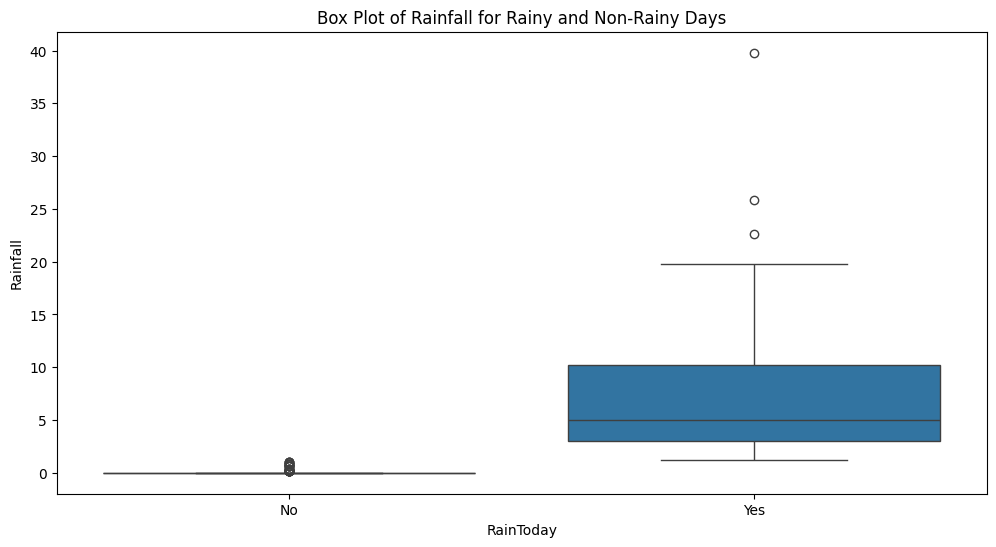

In [40]:
# Assuming df is your DataFrame
plt.figure(figsize=(12, 6))
sns.boxplot(x='RainToday', y='Rainfall', data=df)
plt.title('Box Plot of Rainfall for Rainy and Non-Rainy Days')
plt.show()


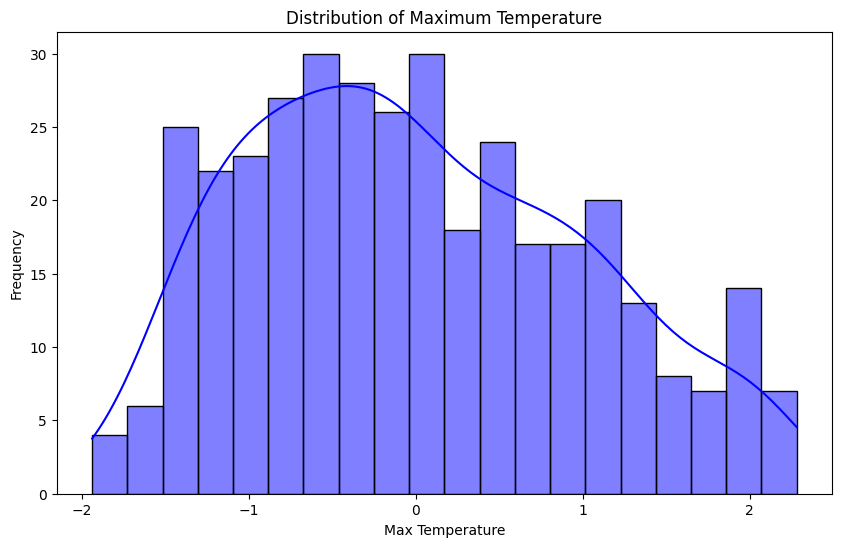

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MaxTemp'], bins=20, kde=True, color='blue')
plt.title('Distribution of Maximum Temperature')
plt.xlabel('Max Temperature')
plt.ylabel('Frequency')
plt.show()


C:\Users\91630\AppData\Local\Temp\ipykernel_10668\391629180.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RainTomorrow', data=df, palette='Set2')


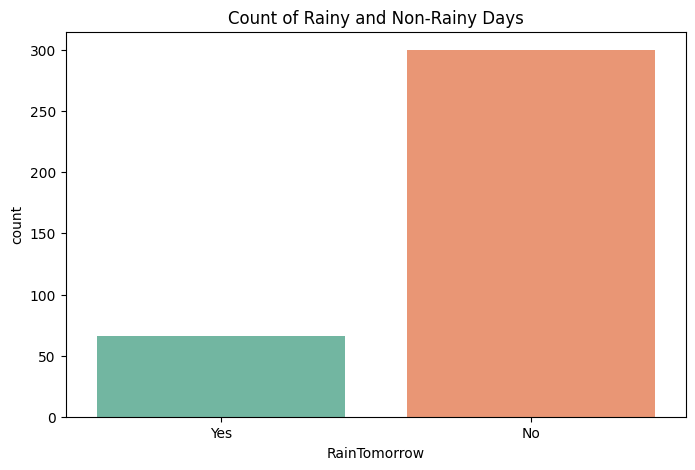

In [42]:
plt.figure(figsize=(8, 5))
sns.countplot(x='RainTomorrow', data=df, palette='Set2')
plt.title('Count of Rainy and Non-Rainy Days')
plt.show()


C:\Users\91630\AppData\Local\Temp\ipykernel_10668\391629180.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RainTomorrow', data=df, palette='Set2')


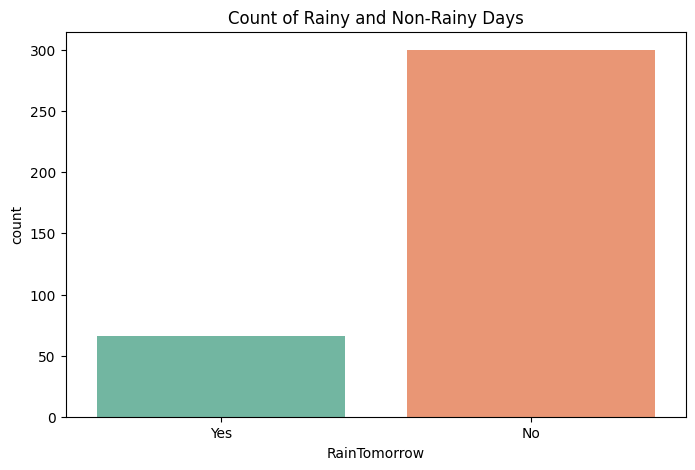

In [43]:
plt.figure(figsize=(8, 5))
sns.countplot(x='RainTomorrow', data=df, palette='Set2')
plt.title('Count of Rainy and Non-Rainy Days')
plt.show()


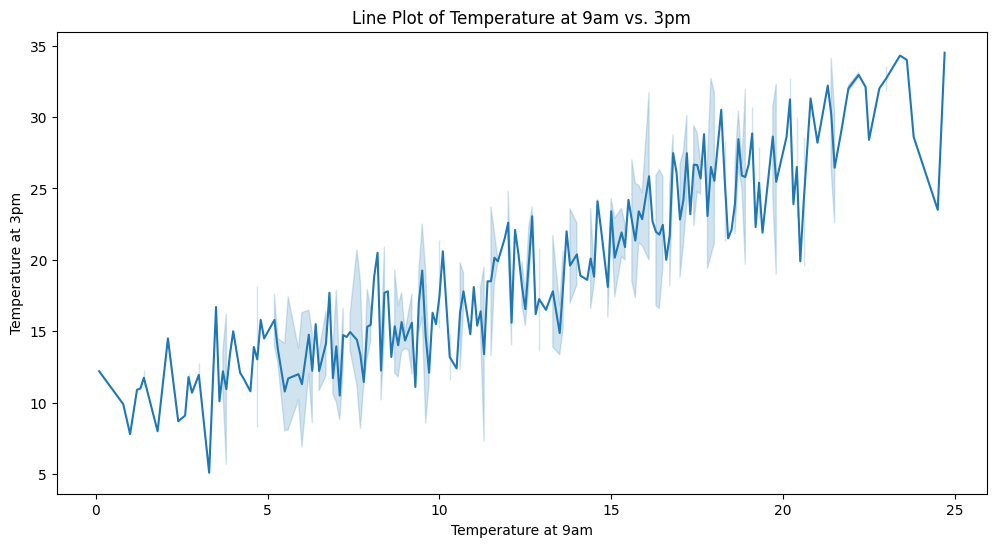

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(12, 6))
sns.lineplot(x='Temp9am', y='Temp3pm', data=df)
plt.title('Line Plot of Temperature at 9am vs. 3pm')
plt.xlabel('Temperature at 9am')
plt.ylabel('Temperature at 3pm')
plt.show()


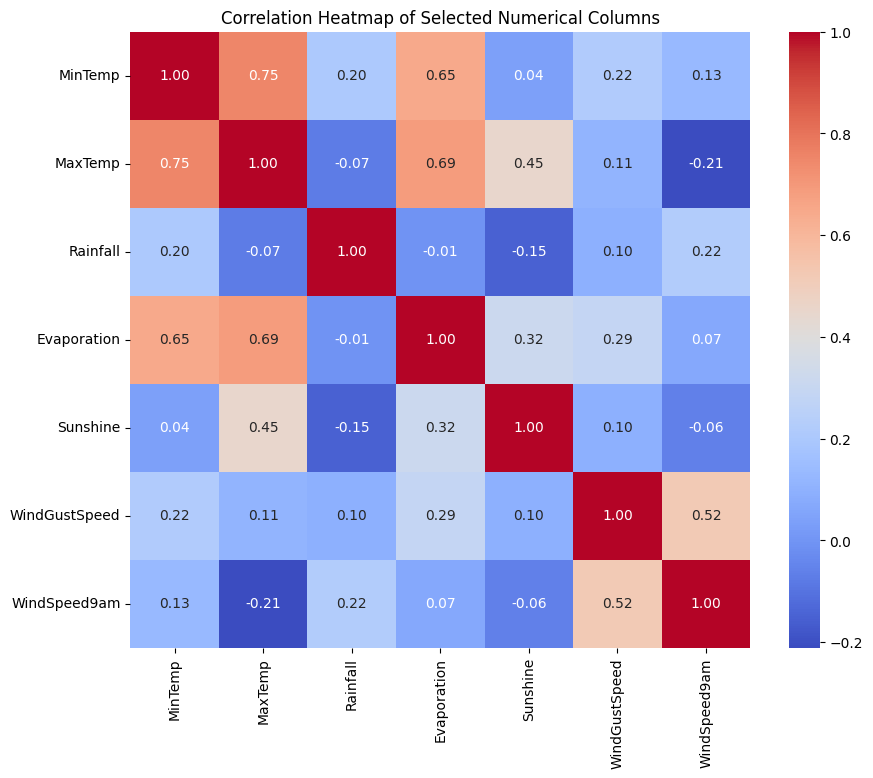

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
selected_numerical_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am']
correlation_matrix = df[selected_numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Numerical Columns')
plt.show()


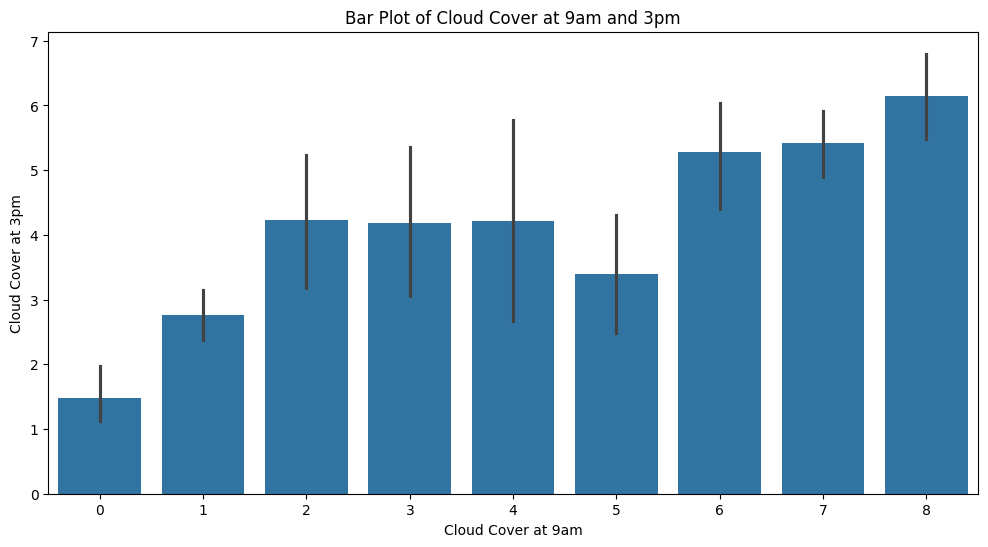

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Cloud9am', y='Cloud3pm', data=df)
plt.title('Bar Plot of Cloud Cover at 9am and 3pm')
plt.xlabel('Cloud Cover at 9am')
plt.ylabel('Cloud Cover at 3pm')
plt.show()


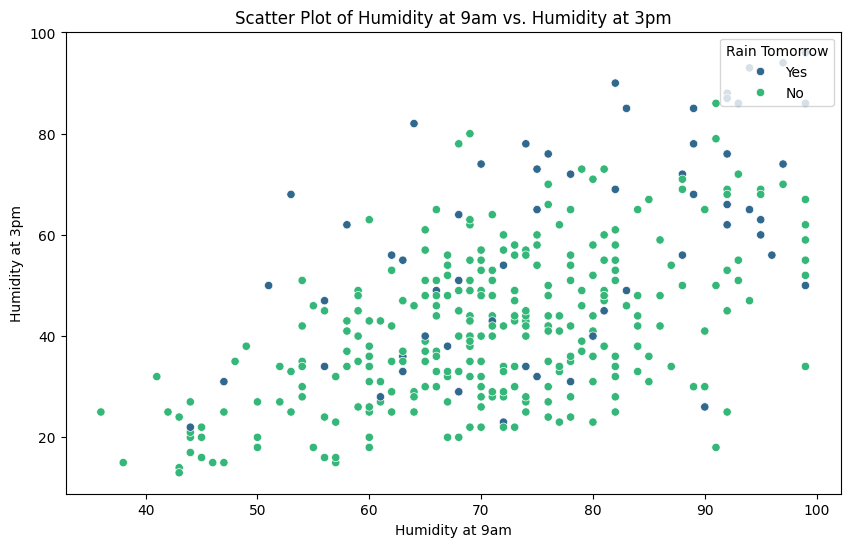

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Humidity9am', y='Humidity3pm', data=df, hue='RainTomorrow', palette='viridis')
plt.title('Scatter Plot of Humidity at 9am vs. Humidity at 3pm')
plt.xlabel('Humidity at 9am')
plt.ylabel('Humidity at 3pm')
plt.legend(title='Rain Tomorrow', loc='upper right')
plt.show()


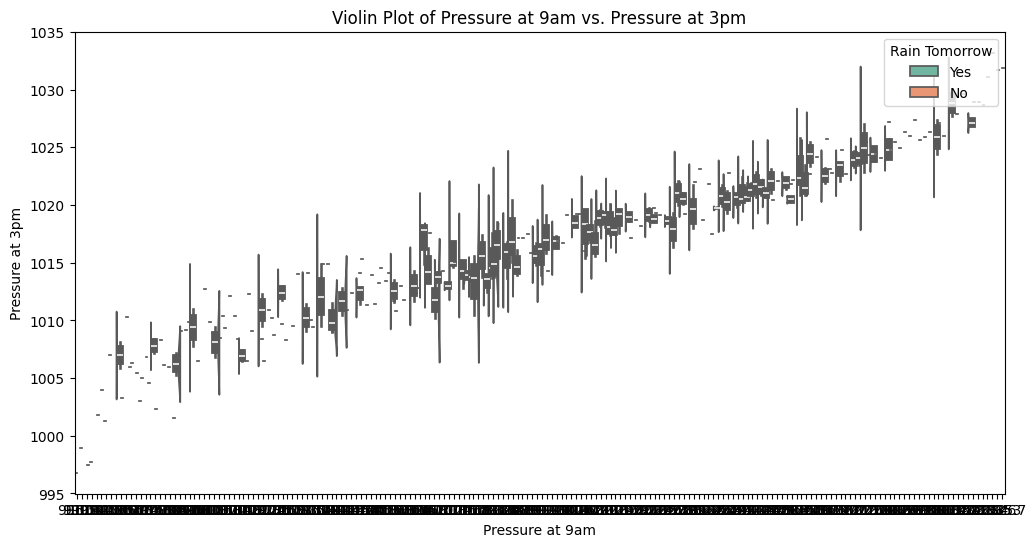

In [57]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Pressure9am', y='Pressure3pm', data=df, hue='RainTomorrow', split=True, palette='Set2')
plt.title('Violin Plot of Pressure at 9am vs. Pressure at 3pm')
plt.xlabel('Pressure at 9am')
plt.ylabel('Pressure at 3pm')
plt.legend(title='Rain Tomorrow', loc='upper right')
plt.show()

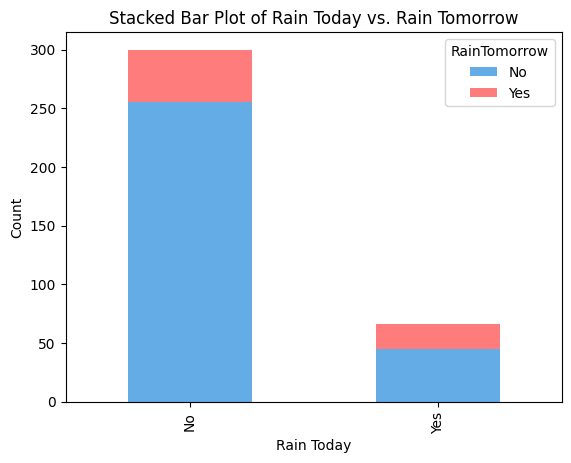

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
cross_tab = pd.crosstab(df['RainToday'], df['RainTomorrow'])
cross_tab.plot(kind='bar', stacked=True, color=['#63ace5', '#ff7c7c'])
plt.title('Stacked Bar Plot of Rain Today vs. Rain Tomorrow')
plt.xlabel('Rain Today')
plt.ylabel('Count')
plt.show()
